# Chapter 12. k-NN

In [1]:
### Define the functions needed in this chapter.
import math

from collections import Counter

def mean(x):
    return sum(x) / len(x)

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def vector_subtract(v,w):
    return [v_i-w_i for v_i, w_i in zip(v,w)]

def sum_of_squares(v):
    # v_1 * v_1 + ... + v_n*v_n
    return dot(v,v)

def sqared_distance(v,w):
    # (v_1 - w_1)**2 + ... + (v_n - w_n)**2
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return math.sqrt(sqared_distance(v,w))

- k-NN의 논리
    * 어떤 특성들이 주어졌고 그 특성들을 바탕으로 결과를 예측하고자 할 때, 결과는 특성들에 의해 어느 정도 영향을 받거나 결정된다.
    * 따라서, 모든 특성을 고려해서 가장 가까운 이웃들만 선별한다면, 모든 이웃을 고려하는 것보다 더 나은 추정을 할 수 있다.

### 12.1 모델

* k-NN(k-Nearest Neighbors)을 예측 모델로 사용하기 위해 필요한 조건들.
    * 1) 거리를 재는 방법.
    * 2) 서로 가까운 점들은 유사하다는 가정.
        * k-NN은 알고자 하는 점 주변에 있는 점들만 보면 되기 때문에, 전체 데이터를 다 뒤지지 않아도 된다.
* k-NN은 예측에는 유용하나, 특정 현상의 원인을 파악하기엔 부적합함.

* 일반적으로, 데이터 포인트들과 각각에 대한 레이블 정보들이 주어진다.
* 그리고 새로운 데이터 포인트가 모델에 들어왔을 때, 가장 거리가 가까운 데이터 포인트들의 레이블을 확인하여 새 데이터 포인트를 분류함.

* k-NN 모델이 새로운 데이터 포인트를 분류하는 원리
    * k값을 정한다.
    * 새로운 데이터 포인트로부터 가장 가까운 k개의 포인트를 찾는다.
    * 찾아낸 포인트들의 레이블을 보고, 가장 빈도가 높은 레이블을 새 데이터 포인트의 레이블로 분류한다(다수결).

In [2]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]  # .most_common: Counter 모듈의 내장함수. 여기선 label 각 원소가 등장한 횟수를 많은 순부터 내림차순 정렬.
    return winner

assert raw_majority_vote(['a', 'b', 'c', 'b']) == 'b'

* 하지만 이 경우, 동점(빈도가 같은 레이블들의 경우)인 레이블들은 제대로 처리되지 않는다.
* 이럴 땐, 다음과 같은 방법을 사용하여 조치한다.
     * 1) 여러 1등 중 임의로 하나를 정한다.
     * 2) 거리를 가중치로 사용해서, 거리 기반 투표를 한다.
     * 3) 단독 1등이 생갈 때까지 k를 하나씩 줄인다.

In [3]:
#k를 점점 줄여가는 방식으로 구현한 코드. 최대 빈도 레이블을 탐색.

def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

In [4]:
def knn_classify(k, labeled_points, new_point):

    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp[0], new_point))

    # Find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote.
    return majority_vote(k_nearest_labels)

### 12-2. 예시: 가장 인기있는 프로그래밍 언어

In [5]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [6]:
#cities는 [(경도, 위도), 선호하는 프로그래밍 언어] 로 구성되어이음
print(len(cities))  #75개 데이터
print(type(cities)) #list형
print(cities[0][1]) #0번째 데이터의 'language'

75
<class 'list'>
Python


In [7]:
def plot_state_borders(plt, color='0.8'):
    pass

In [8]:
import matplotlib.pyplot as plt

# 프로그래밍 언어가 키, (경도, 위도) 쌍이 값
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# 각 프로그래밍 언어마다 색깔과 마커가 다름
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# 각 프로그래밍 언어마다 데이터 포인트를 뿌림
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                label=language, zorder=10)

plot_state_borders(plt)    # 주 경계선을 그려 주는 함수ㄱㅏ 있다고 가정

plt.legend(loc=0)          # matplolib 가 알아서 위치 선정
plt.axis([-130,-60,20,55]) # 축 설정
plt.title("Favorite Programming Languages")
plt.show()

<Figure size 640x480 with 1 Axes>

* 인접한 도시끼리 비슷한 언어를 좋아하는 경향을 보인다.
* 이제, 도시의 이웃 도시들을 통해 해당 도시의 선호 언어를 추정하는 방법이 얼마나 좋은지 확인한다.

In [9]:
for k in [1,3,5,7]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                        for other_city in cities
                        if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)
        
        if predicted_language == actual_language:
            num_correct += 1
            
    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))
    
# 3개의 근접이웃을 봤을 때(즉 k=3일 때) 성능이 59%로 가장 좋다.

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


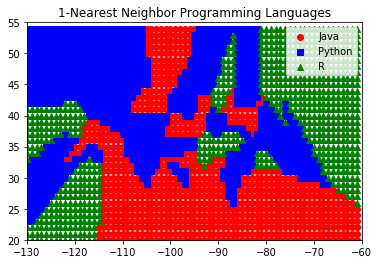

In [10]:
# k = 1 일떄

plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 1 # 3 혹은 5 등등..

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)


for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

plot_state_borders(plt, color='black')   

plt.legend(loc=0)         
plt.axis([-130,-60,20,55])
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

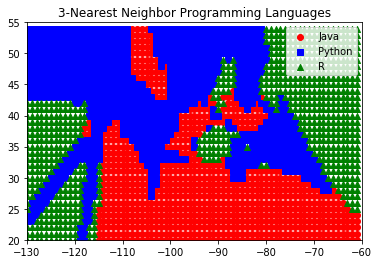

In [11]:
# k = 3 일떄

plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 3 # 3 혹은 5 등등..

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)


for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

plot_state_borders(plt, color='black')   

plt.legend(loc=0)         
plt.axis([-130,-60,20,55])
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

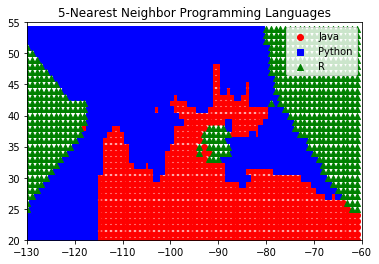

In [12]:
# k = 5 일떄

plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 5 # 3 혹은 5 등등..

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)


for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

plot_state_borders(plt, color='black')   

plt.legend(loc=0)         
plt.axis([-130,-60,20,55])
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

### 12-3. 차원의 저주

* 차원의 저주(Curse of dimensionality)
    - 데이터가 고차원이기 때문에 생기는 문제.
    - 데이터가 고차원이라는 것은, 다루는 공간이 엄청나게 크다는 뜻.
    - 데이터가 고차원이므로, 데이터 포인트들은 서로 근접하지 않게 된다.
* 차원의 저주 현상 관찰
    - d차원 단위 범위 내에 다양한 차원으로 임의의 점 두 개를 생성해 보면 된다.

In [13]:
#임의의 점 생성
def random_point(dim):
    return [random.random() for _ in range(dim)]

In [14]:
#두 점 사이의 거리 재기
def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
           for _ in range(num_pairs)]

In [15]:
#1차원~100차원까지 각각의 차원에 대해 총 10,000개의 거리를 계산한 뒤, 각 점들 간의 평군 거리와 최소 거리를 구하기.
import random

dimensions = range(1, 101)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000)  #10,000개의 임의의 쌍
    avg_distances.append(mean(distances))     #평균 거리 저장
    min_distances.append(min(distances))      #최소 거리 저장

In [16]:
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]

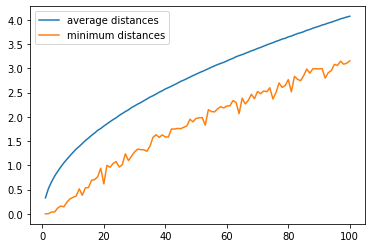

In [17]:
plt.plot(dimensions, avg_distances)
plt.plot(dimensions, min_distances)
plt.legend(['average distances', 'minimum distances'])
plt.show()

* 차원이 증가할수록 점들 간 평균 거리가 증가한다.

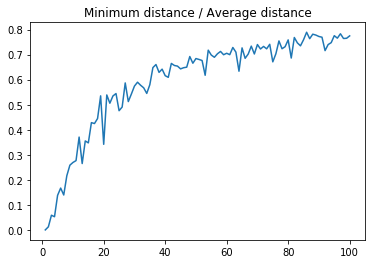

In [18]:
plt.plot(dimensions, min_avg_ratio)
plt.title('Minimum distance / Average distance')
plt.show()

* 최근접거리와 평균 거리의 비율도 증가함.
* 차원이 적을 때는 
* 두 점이 가깝다는 것은, 모든 차원에 대해 가까워야 하는 것이다. 따라서, 차원이 추가된다는 것은 두 점이 가까울 수 있는 가능성이 줄어든다는 의미이다.
* 이렇듯, 고차원에서는 근접이웃들이 평균 거리와 그렇게 차이가 나지 않게 되고, 가깝다는 것이 큰 의미가 없어짐.

* 공간의 성김(sparsity) 문제

* 좌표명면 상에서 1차원 데이터는 수직 형태의 직선으로, 2차원의 (x, y) 데이터는 점으로 표현된다. 3차원 (x, y, z)는 3차원 공간 상의 한 점으로 표현된다.
* 즉, 차원이 높아질수록 좌표평면에 아무것도 찍히지 않은, 빈 공간이 더 많아진다는 뜻이다.
* 차원이 높아질수록 점들 사이의 거리가 멀어지고, 빈 공간이 많아진다.
* 따라서, 고차원에서 k-NN을 이용하려면, 먼저 차원 축소를 하는 것이 좋다.